# Метод стрельбы для численного решения краевой задачи


## Краевая задача


**Краевая задача** - задача о нахождении частного решения дифференциального уравнения, удовлетворяющее краевым (граничным) условиям на концах заданного интервала или границе области.

Краевая задача для ОДУ 2-го порядка выглядит следующим образом:

\begin{align}
& y'' = f(x, y, y'), \quad a < x < b \tag{1} \\
& y(a) = A, \quad y(b) = B \tag{2} \\
\end{align}

где $(1)$ - заданное ОДУ 2-го порядка, $(2)$ - краевые условия на концах отрезка $[a, b]$.

## Метод стрельбы

Суть метода стрельбы заключается в сведении решения краевой задачи к многократному решению задачи Коши.

Введём функцию:
\begin{equation}
z(x) = y'(x) \tag{3}
\end{equation}

Тогда краевую задачу $(1), (2)$ можно записать в виде системы задач Коши:
\begin{equation}
y' = z, \quad y(a) = A \tag{4}
\end{equation}

\begin{equation}
z' = f(x, y, z), \quad z(a) = y'(a) = \eta \tag{5}
\end{equation}

Поскольку производная функции в точке равна тангенсу угла наклона касательной, проведенной к интегральной кривой в этой точке, то параметр $\eta$ можно представить в виде: $\eta = \tan \alpha$. Тогда можно сравнить многократное решение задачи Коши с различными значениями $\eta$ с баллистической задачей, когда находясь на некотором расстоянии от мишени проводят серию выстрелов с различными значениями угла $\alpha$ до тех пор, пока не попадут в цель.

В случае краевой задачи "целью" является точка $(b, B)$:

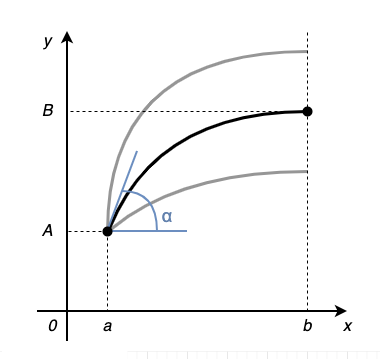

Вводится функция ошибки:

\begin{equation}
\Phi(\eta) = y(b; \eta) - B \tag{6}
\end{equation}

где $y(x, \eta)$ - решение краевой задачи при заданном параметре $\eta$.

Таким образом, метод стрельбы заключается в проведении некоторого числа "выстрелов" (решений задачи Коши) с целью получения значения $\eta = \eta^*$ такого, что $|\Phi(\eta^*)| \leq \epsilon$, где $\epsilon$ - заданная точность решения задачи.

Для метода Эйлера решение задачи Коши $(4), (5)$ примет следующий вид:

\begin{equation}
x_{i+1} = x_i + h, \quad y_{i+1} = y_i + h z_i, \quad z_{i+1} = z_i + h f(x_i, y_i, z_i) \tag{7}
\end{equation}
\begin{equation}
x_0 = a, \quad y_0 = A, \quad z_0 = \eta \tag{8}
\end{equation}

Для выбора значения параметра $\eta$ на каждом этапе решениия используют те же методы, что и при решении нелинейных уравнений: метод деления отрезка пополам и метод хорд.

Сначала выбираются два значения $\eta_1$, $\eta_2$, в которых функция $\Phi(\eta)$ принимает противоположные по знаку значения.

**Метод деления отрезка попопалам** заключается в поиске значения в интервале $(\eta_1, \eta_2)$. На каждой итерации вычисляется значение $\Phi(\eta^*)$ в середине интервала $\eta^* = \frac{\eta_1 + \eta_2}{2}$. Если |$\Phi(\eta^*)| \leq \epsilon$, то $y(x; \eta^*)$ - искомая интегральная кривая. В противном случае следует продолжать работу метода в интервале $(\eta_1, \eta^*)$, если $\Phi(\eta_1) \Phi(\eta^*) < 0$, и в интервале $(\eta^*, \eta_2)$ в противном случае.

При применении **метода хорд** применяется формула:
\begin{equation}
\eta_{i+1}=\frac{\eta_{i-1}\Phi(\eta_i) - \eta_{i}\Phi(\eta_{i-1})}{\Phi(\eta_i) - \Phi(\eta_{i-1})} \tag{9}
\end{equation}

Итерации прекращаются при выполнении условия окончания |$\Phi(\eta_k)| \leq \epsilon$ или $|\eta_{k+1} - \eta_k| \leq \epsilon$

# Задача

Реализуйте метод стрельбы для решения краевой задачи ОДУ 2-го порядка. При многократном решении задачи Коши используйте функцию `cauchy` из задачи 1 и метод выбора значения $\eta$ в зависимости от варианта. Нарисуйте график с отображением всех интегральных кривых, полученных в процессе решения задачи.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, u: u[-1] + u[-2] + x
h = 0.01
error = 0.01
x_a, y_a = 0, 0
x_b, y_b = 1, 0
eta_1 = -10
eta_2 = 10
u_0 = np.array([y_a, eta_1])

In [2]:
def hord(f, x1, x2, eps):
    amount_of_itterations = 0
    current = x1
    previous = x2
    roots = [x1, x2]

    while math.fabs(previous - current) > eps:
        root = ( previous * f(current) - current * f(previous) ) / (f(current) - f(previous))
        roots.append(root)
        
        previous = current
        current = root
        
        amount_of_itterations += 1
    return root, amount_of_itterations, roots

In [3]:
def cauchy(f, u0, x0, xn, h):
    func = lambda x, u: np.append(u[1:], f(x, u))
    x = x0
    u = np.array(u0)
    res = [(x, u[0])]
    while x + h <= xn:
        u = u + h * func(x, u)
        x += h
        res.append((x, u[0]))
    res = np.array(res)
    return np.linspace(x0, xn, int((xn-x0)/h)+1), res[:,1]

x, y = cauchy(f, u_0, x_a, x_b, h)

In [4]:
def shooting_method( f, x_0, x_n, h, y_n, error, eta_1, eta_2 ):
    y_array = []
    
    def error_function(u):
        u_0 = [y_a, u]
        x_temp, y_temp = cauchy(f, u_0, x_0, x_n, h)
        return y_temp[-1] - y_n


    root, amount_of_itterations, roots = hord(error_function, eta_1, eta_2, error)
    
    for i in range(len(roots)):
        x , y = cauchy(f, np.array( [y_a,roots[i]] ), x_0, x_n, h)
        y_array.append(y)

    return x[:-1], y_array

x, y = shooting_method( f, x_a, x_b, h, y_b, error, eta_1, eta_2 )

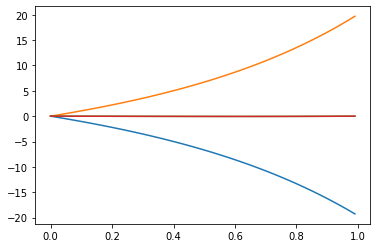

In [5]:
for i in range(len(y)):
    plt.plot(x, y[i])

plt.show()

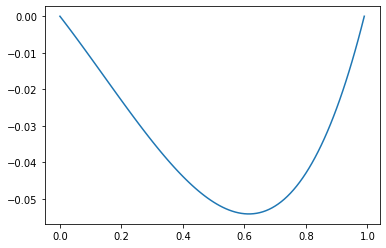

In [6]:
plt.plot(x, y[-1])